# 🧠 Goal:
### Measure how news sentiment correlates with stock price changes on the same day or in following days (lag effect).

## 1. Prepare Stock Price Data
Ensure your historical stock data is cleaned and includes:

Date, Close, Open, High, Low, Adj Close, Volume

Add daily price change and % return:

In [1]:
import pandas as pd

df_stock =  pd.read_csv("dataset/Apple_Stock.csv")

df_stock['Date'] = pd.to_datetime(df_stock['Date'],format='mixed', errors='coerce')
df_stock = df_stock.sort_values('Date')
df_stock['Price_Change'] = df_stock['Close'].diff()
df_stock['Return_%'] = df_stock['Close'].pct_change() * 100

df_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price_Change,Return_%
0,2012-01-30,13.395450,13.641594,13.385833,13.614845,379341200,0.0,0,NaN,NaN
1,2012-01-31,13.692390,13.772033,13.616653,13.719138,391683600,0.0,0,0.104293,0.766023
2,2012-02-01,13.777143,13.794574,13.691188,13.710422,270046000,0.0,0,-0.008717,-0.063536
3,2012-02-02,13.701707,13.739875,13.644003,13.678265,186796400,0.0,0,-0.032157,-0.234544
4,2012-02-03,13.743781,13.824927,13.691487,13.815310,286599600,0.0,0,0.137045,1.001917


In [5]:
import pandas as pd

# Load news data
df_news = pd.read_csv('dataset/news_output.csv')

# Load keywords
df_keywords = pd.read_csv('dataset/keywords.csv')
keywords = df_keywords['Keyword'].dropna().str.lower().tolist()

# Combine title + content (optional)
df_news['Text'] = (df_news['headline'].fillna('') + ' ' + df_news['short_description'].fillna('')).str.lower()

# Function to check if any keyword is in the text
def contains_keyword(text, keyword_list):
    return any(keyword in text for keyword in keyword_list)

# Apply filter
df_news['Matches'] = df_news['Text'].apply(lambda x: contains_keyword(x, keywords))

# Filtered articles
filtered_df = df_news[df_news['Matches'] == True]
df_news = df_news[df_news['Matches'] == True]

# Save or display result
filtered_df.to_csv('filtered_news.csv', index=False)
df_news['date'] = pd.to_datetime(df_news['date'], format='mixed', errors='coerce')
print(df_news.head())


                                                   link  \
110   https://www.huffpost.com/entry/texas-uvalde-sc...   
397   https://www.huffpost.com/entry/stranger-things...   
427   https://www.huffpost.com/entry/abortion-clinic...   
585   https://www.huffpost.com/entry/a-new-labor-mov...   
1401  https://www.huffpost.com/entry/funniest-tweets...   

                                               headline       category  \
110   Uvalde Children Grapple With Trauma After Scho...      U.S. NEWS   
397   ‘Stranger Things’ Fans Who Call The Surfer Boy...  ENTERTAINMENT   
427   Abortion Clinic Staff Grapple With Trauma Foll...      U.S. NEWS   
585   WATCH LIVE — A New Labor Movement: How Workers...       POLITICS   
1401  26 Of The Funniest Tweets About Cats And Dogs ...         COMEDY   

                                      short_description  \
110   Students who survived the May 24 shooting at R...   
397   People who call the number featured on the sid...   
427   Nationwide, worke

In [6]:
from textblob import TextBlob

def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(text).sentiment.polarity  # Output: -1 to +1

df_news['Sentiment'] = df_news['headline'].apply(get_sentiment)
df_news.head()

,link,headline,category,short_description,authors,date,Text,Matches,Sentiment
110,https://www.huffpost.com/entry/texas-uvalde-sc...,Uvalde Children Grapple With Trauma After Scho...,U.S. NEWS,Students who survived the May 24 shooting at R...,"Acacia Coronado and Adriana Gomez Licon, AP",2022-09-04,uvalde children grapple with trauma after scho...,True,0.000000
397,https://www.huffpost.com/entry/stranger-things...,‘Stranger Things’ Fans Who Call The Surfer Boy...,ENTERTAINMENT,People who call the number featured on the sid...,Elyse Wanshel,2022-07-11,‘stranger things’ fans who call the surfer boy...,True,0.000000
427,https://www.huffpost.com/entry/abortion-clinic...,Abortion Clinic Staff Grapple With Trauma Foll...,U.S. NEWS,"Nationwide, workers at clinics that shuttered ...","Leah Willingham, AP",2022-07-04,abortion clinic staff grapple with trauma foll...,True,0.000000
585,https://www.huffpost.com/entry/a-new-labor-mov...,WATCH LIVE — A New Labor Movement: How Workers...,POLITICS,Tune in on July 20 to watch our panel discussi...,Amanda Terkel,2022-06-01,watch live — a new labor movement: how workers...,True,0.136364
1401,https://www.huffpost.com/entry/funniest-tweets...,26 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Animals are so funny you can name a cat iphon...",Elyse Wanshel,2021-12-31,26 of the funniest tweets about cats and dogs ...,True,0.000000


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    if pd.isna(text):
        return 0
    return sia.polarity_scores(text)['compound']  # Output: -1 to +1

df_news['Sentiment'] = df_news['headline'].apply(get_vader_sentiment)
df_news.head()
df_sentiment_daily = df_news.groupby('date')['Sentiment'].mean().reset_index()
df_sentiment_daily.to_csv("dataset/daily_news_sentiment.csv", index=False)
df_sentiment_daily['Date'] = pd.to_datetime(df_sentiment_daily['date'], format='mixed', errors='coerce')
df_sentiment_daily['Date'] = pd.to_datetime(df_sentiment_daily['Date'], errors='coerce').dt.date

print(df_sentiment_daily.head())
print(df_stock.head())

        date  Sentiment        Date
0 2012-01-28   -0.15910  2012-01-28
1 2012-01-31    0.00000  2012-01-31
2 2012-02-01   -0.35480  2012-02-01
3 2012-02-04   -0.34000  2012-02-04
4 2012-02-05    0.10115  2012-02-05
        Date       Open       High        Low      Close     Volume  \
0 2012-01-30  13.395450  13.641594  13.385833  13.614845  379341200   
1 2012-01-31  13.692390  13.772033  13.616653  13.719138  391683600   
2 2012-02-01  13.777143  13.794574  13.691188  13.710422  270046000   
3 2012-02-02  13.701707  13.739875  13.644003  13.678265  186796400   
4 2012-02-03  13.743781  13.824927  13.691487  13.815310  286599600   

   Dividends  Stock Splits  Price_Change  Return_%  
0        0.0             0           NaN       NaN  
1        0.0             0      0.104293  0.766023  
2        0.0             0     -0.008717 -0.063536  
3        0.0             0     -0.032157 -0.234544  
4        0.0             0      0.137045  1.001917  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# Convert to datetime and remove timezones (if any)
df_stock['Date'] = pd.to_datetime(df_stock['Date'], utc=True).dt.tz_localize(None)
df_sentiment_daily['Date'] = pd.to_datetime(df_sentiment_daily['Date'], utc=True).dt.tz_localize(None)

# Confirm types (optional, for debugging)
print("Stock Date dtype:", df_stock['Date'].dtype)
print("Sentiment Date dtype:", df_sentiment_daily['Date'].dtype)

# Now perform the merge
df_merged = pd.merge(df_stock, df_sentiment_daily, on='Date', how='inner')

# Save to CSV
df_merged.to_csv("dataset/merged_data.csv", index=False)
print("Merged dataset saved.")

Stock Date dtype: datetime64[ns]
Sentiment Date dtype: datetime64[ns]
Merged dataset saved.


In [9]:
correlation = df_merged[['Sentiment', 'Price_Change', 'Return_%']].corr()
print(correlation)

              Sentiment  Price_Change  Return_%
Sentiment      1.000000      0.005987  0.024288
Price_Change   0.005987      1.000000  0.812777
Return_%       0.024288      0.812777  1.000000


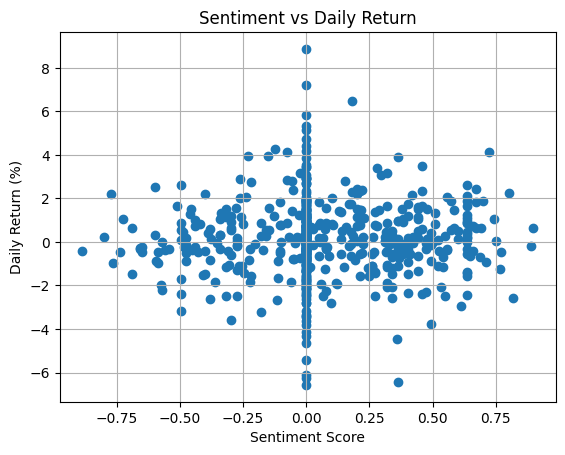

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['Sentiment'], df_merged['Return_%'])
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Return (%)')
plt.title('Sentiment vs Daily Return')
plt.grid(True)
plt.show()

In [11]:
df_merged['Price_Up'] = (df_merged['Return_%'] > 0).astype(int)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df_merged[['Sentiment']]
y = df_merged['Price_Up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.27      0.39        56
           1       0.59      0.91      0.71        64

    accuracy                           0.61       120
   macro avg       0.65      0.59      0.55       120
weighted avg       0.65      0.61      0.56       120



In [10]:
df_merged = df_merged.sort_values('Date')
df_merged['Target'] = (df_merged['Close'].shift(-1) > df_merged['Close']).astype(int)

# 5-day and 10-day moving averages of closing price
df_merged['MA_5'] = df_merged['Close'].rolling(window=5).mean()
df_merged['MA_10'] = df_merged['Close'].rolling(window=10).mean()

df_merged['MA_3'] = df_merged['Close'].rolling(window=3).mean()
df_merged['MA_20'] = df_merged['Close'].rolling(window=20).mean()

# Lag previous 1 to 3 days of sentiment
for lag in range(1, 4):
    df_merged[f'Sentiment_lag_{lag}'] = df_merged['Sentiment'].shift(lag)

df_merged['Return_%'] = df_merged['Close'].pct_change() * 100
df_merged['Return_lag_1'] = df_merged['Return_%'].shift(1)
df_merged['Return_lag_2'] = df_merged['Return_%'].shift(2)
df_merged.dropna(inplace=True)

features = [
    'Sentiment', 'Sentiment_lag_1', 'Sentiment_lag_2', 'Sentiment_lag_3',
    'MA_5', 'MA_10', 'Return_lag_1', 'Return_lag_2'
]

X = df_merged[features]
y = df_merged['Target']  # or your custom label

# Calculate % change between today and next day
df_merged['Return_Next_Day'] = df_merged['Close'].pct_change(periods=-1) * 100
def classify_movement(change, threshold=0.5):
    if change > threshold:
        return 1     # Significant Rise
    elif change < -threshold:
        return -1    # Significant Drop
    else:
        return 0     # Neutral

df_merged['Target'] = df_merged['Return_Next_Day'].apply(lambda x: classify_movement(x, threshold=0.5))
print(df_merged['Target'].value_counts())
X = df_merged[features]
y = df_merged['Target']

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


Target
-1    1012
 1     833
 0     817
Name: count, dtype: int64


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
